In [148]:
from ComputationalGraphPrimer import *
import torch
import os
import random
import numpy
import sys,os,os.path
import numpy as np
import re
import operator
import itertools
import math
import random
import torch
from collections import deque
import copy
import matplotlib.pyplot as plt
import networkx as nx

### A brief description for SGD, SGD+ and Adam 

### 1. SGD

SGD (Stochastic Gradient Descent) is an important machine algorithm and has multiple advantages over simple gradient descent.  
SGD training the machine learning in small batches of the whole data.This can significantly reduce the computation cost and are less likely to get stuck in the local minimum.

The parameter update equation for SGD is:  
$p_{t+1} = p_t + v_{t+1}$, where $v_{t+1} = 2 * \alpha * \epsilon * J_F(p_t)$ is the gradient, $\alpha$ is the learning rate. 

### 2. SGD+

SGD+ represents SGD with momentum.  
SGD has constant learning rate, which encounters problems like slow converging speed near the minimum, oscillation near a narrow valley.  
SGD+ solve these to issue by introducing momentum. The current update of the parameter are decided by a combination of current and previous gradient. The momentum will speed up the converging near the minimum and reduce oscillation when the gradient change sign.  

The parameter update equation for SGD+ is:  
$v_{t+1} = \mu * v_{t} + g_{t+1} $  
$p_{t+1} = p_t + \alpha * v_t$,   
where $g_{t+1} = 2 * \alpha * \epsilon * J_F(p_t)$ is the gradient, $\alpha$ is the learning rate.  
$\mu \in [0, 1]$ decides the weight of gradient from the previous iteration. 

### 3. Adam

Adam (Adaptive Momentum Estimation) has become the most used machine learning optimizer in the past few years. Adam consider both momentum and gradient adaptation. Adam algorithm is robust and efficient.

The parameter update equation for Adam is:

$m_{t+1} = \beta_1 * m_{t} + (1-\beta_1) * g_{t+1} $   
$v_{t+1} = \beta_2 * v_{k} + (1-\beta_2) * g^2_{t+1} $    
$\hat{m}_{t+1} = m_{t+1}/(1-\beta^t_1)$  
$\hat{v}_{t+1} = v_{t+1}/(1-\beta^t_2)$  
$p_{t+1} = p_t + \alpha * \frac{\hat{m}_t}{\sqrt{\epsilon + \hat{v}_{t+1}}}$,   
where $g_{t+1} = 2 * \alpha * \epsilon * J_F(p_t)$ is the gradient, $\alpha$ is the learning rate. $\epsilon$ is a small value to aviod zero denominator. $\beta_1$ and $\beta_2$ (close to 1) are decay rates for the first and second moments of the gradient.



## task 1: compare one_neuron_classifier, multi_neuron_classifier with verify_with_torchnn 

### It is clearly shown that the torchnn outperformances the SGD algorithm with a much smaller loss



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


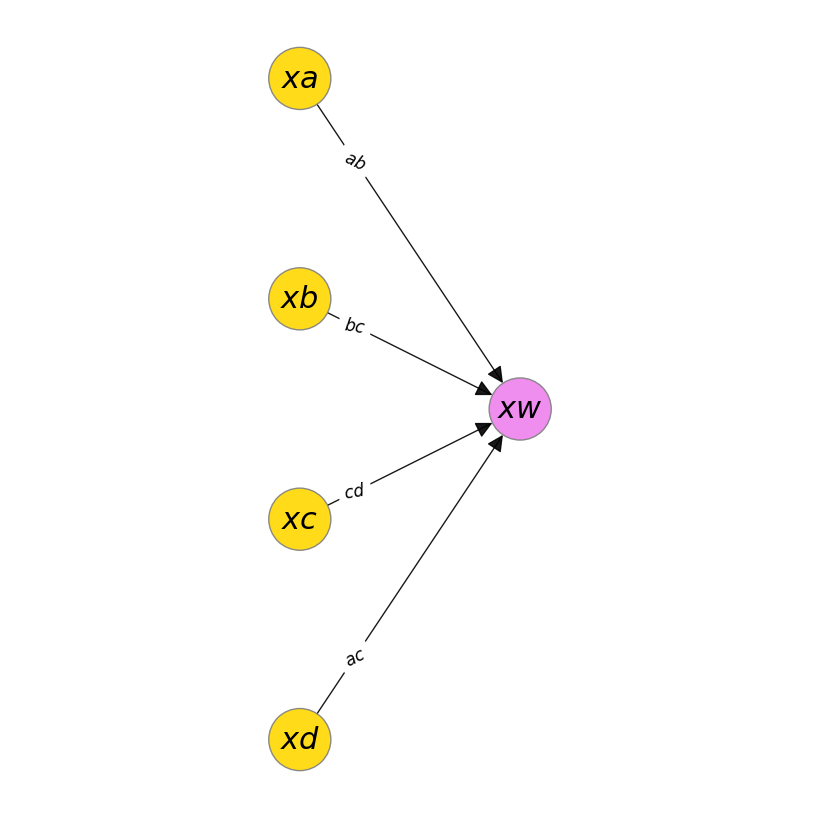

[iter=1]  loss = 0.0036
[iter=101]  loss = 0.2929
[iter=201]  loss = 0.2976
[iter=301]  loss = 0.3124
[iter=401]  loss = 0.3145
[iter=501]  loss = 0.2939
[iter=601]  loss = 0.3008
[iter=701]  loss = 0.3025
[iter=801]  loss = 0.2975
[iter=901]  loss = 0.3054
[iter=1001]  loss = 0.3101
[iter=1101]  loss = 0.3072
[iter=1201]  loss = 0.2839
[iter=1301]  loss = 0.2859
[iter=1401]  loss = 0.2951
[iter=1501]  loss = 0.3169
[iter=1601]  loss = 0.2898
[iter=1701]  loss = 0.2978
[iter=1801]  loss = 0.2867
[iter=1901]  loss = 0.2842
[iter=2001]  loss = 0.2879
[iter=2101]  loss = 0.2968
[iter=2201]  loss = 0.2960
[iter=2301]  loss = 0.2967
[iter=2401]  loss = 0.2830
[iter=2501]  loss = 0.2878
[iter=2601]  loss = 0.2825
[iter=2701]  loss = 0.2922
[iter=2801]  loss = 0.2868
[iter=2901]  loss = 0.2873
[iter=3001]  loss = 0.2877
[iter=3101]  loss = 0.2775
[iter=3201]  loss = 0.2791
[iter=3301]  loss = 0.2933
[iter=3401]  loss = 0.2708
[iter=3501]  loss = 0.2884
[iter=3601]  loss = 0.2751
[iter=3701]  

[iter=29701]  loss = 0.2204
[iter=29801]  loss = 0.2254
[iter=29901]  loss = 0.2219
[iter=30001]  loss = 0.2218
[iter=30101]  loss = 0.2210
[iter=30201]  loss = 0.2188
[iter=30301]  loss = 0.2237
[iter=30401]  loss = 0.2216
[iter=30501]  loss = 0.2257
[iter=30601]  loss = 0.2237
[iter=30701]  loss = 0.2225
[iter=30801]  loss = 0.2225
[iter=30901]  loss = 0.2225
[iter=31001]  loss = 0.2228
[iter=31101]  loss = 0.2240
[iter=31201]  loss = 0.2224
[iter=31301]  loss = 0.2236
[iter=31401]  loss = 0.2207
[iter=31501]  loss = 0.2246
[iter=31601]  loss = 0.2201
[iter=31701]  loss = 0.2212
[iter=31801]  loss = 0.2214
[iter=31901]  loss = 0.2246
[iter=32001]  loss = 0.2209
[iter=32101]  loss = 0.2234
[iter=32201]  loss = 0.2228
[iter=32301]  loss = 0.2243
[iter=32401]  loss = 0.2213
[iter=32501]  loss = 0.2224
[iter=32601]  loss = 0.2206
[iter=32701]  loss = 0.2239
[iter=32801]  loss = 0.2215
[iter=32901]  loss = 0.2228
[iter=33001]  loss = 0.2246
[iter=33101]  loss = 0.2222
[iter=33201]  loss =

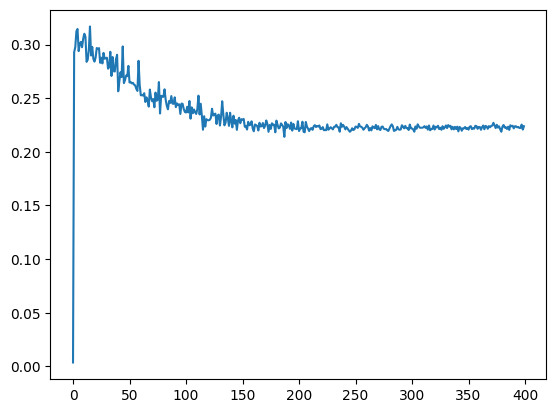

In [153]:
# run one neuron model
seed = 0           
random.seed(seed)
numpy.random.seed(seed)

from ComputationalGraphPrimer import *

cgp = ComputationalGraphPrimer(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = 1e-3,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

cgp.parse_expressions()

#cgp.display_network1()
#cgp.display_network2()
cgp.display_one_neuron_network()      

training_data = cgp.gen_training_data()

cgp.run_training_loop_one_neuron_model(training_data)



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


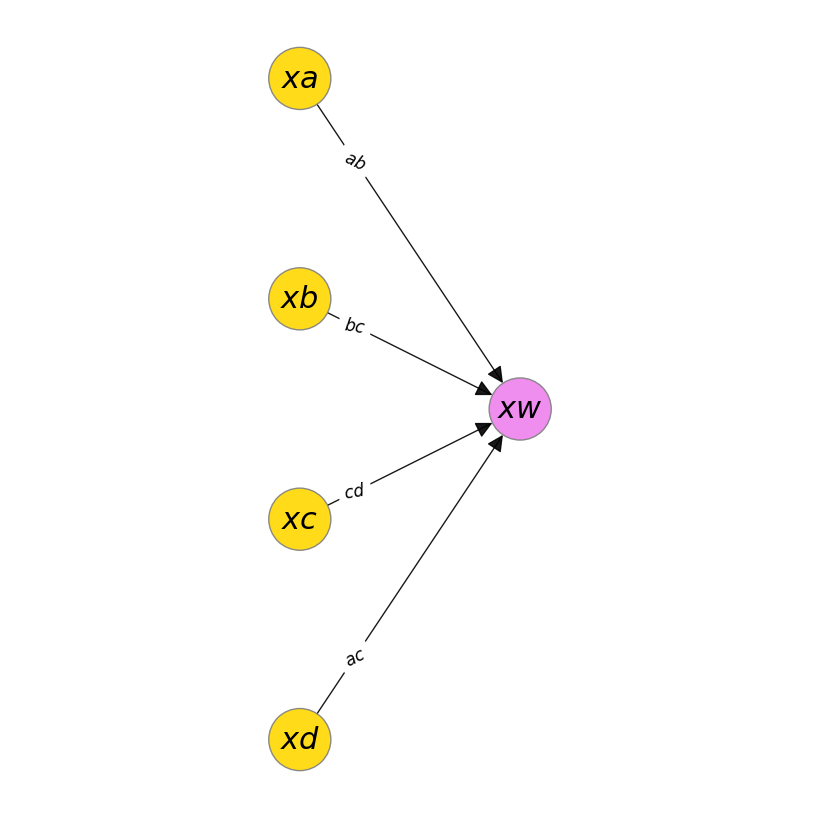

In [164]:
Loss_SGD_one_neuron = run_SGD_m_one_neuron(learning_rate=1e-3, mu = 0, training_iterations = 100000)



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

[iter=21101]  loss = 0.2478
[iter=21201]  loss = 0.2469
[iter=21301]  loss = 0.2477
[iter=21401]  loss = 0.2487
[iter=21501]  loss = 0.2486
[iter=21601]  loss = 0.2485
[iter=21701]  loss = 0.2476
[iter=21801]  loss = 0.2484
[iter=21901]  loss = 0.2476
[iter=22001]  loss = 0.2480
[iter=22101]  loss = 0.2481
[iter=22201]  loss = 0.2478
[iter=22301]  loss = 0.2473
[iter=22401]  loss = 0.2468
[iter=22501]  loss = 0.2487
[iter=22601]  loss = 0.2472
[iter=22701]  loss = 0.2476
[iter=22801]  loss = 0.2482
[iter=22901]  loss = 0.2481
[iter=23001]  loss = 0.2477
[iter=23101]  loss = 0.2473
[iter=23201]  loss = 0.2487
[iter=23301]  loss = 0.2489
[iter=23401]  loss = 0.2479
[iter=23501]  loss = 0.2469
[iter=23601]  loss = 0.2473
[iter=23701]  loss = 0.2487
[iter=23801]  loss = 0.2476
[iter=23901]  loss = 0.2493
[iter=24001]  loss = 0.2486
[iter=24101]  loss = 0.2484
[iter=24201]  loss = 0.2476
[iter=24301]  loss = 0.2477
[iter=24401]  loss = 0.2475
[iter=24501]  loss = 0.2473
[iter=24601]  loss =

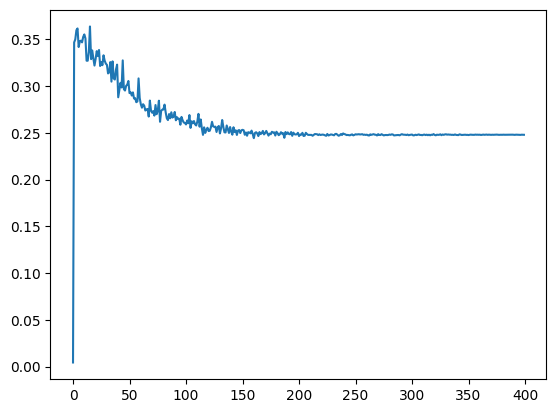

In [152]:
# run multi neuron model
seed = 0           
random.seed(seed)
numpy.random.seed(seed)

from ComputationalGraphPrimer import *

cgp = ComputationalGraphPrimer(
               num_layers = 3,
               layers_config = [4,2,1],                         # num of nodes in each layer
               expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                              'xz=bp*xp+bq*xq+br*xr+bs*xs',
                              'xo=cp*xw+cq*xz'],
               output_vars = ['xo'],
               dataset_size = 5000,
               learning_rate = 1e-3,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

cgp.parse_multi_layer_expressions()

#cgp.display_network1()
#cgp.display_network2()
cgp.display_multi_neuron_network()   

training_data = cgp.gen_training_data()

cgp.run_training_loop_multi_neuron_model( training_data )



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

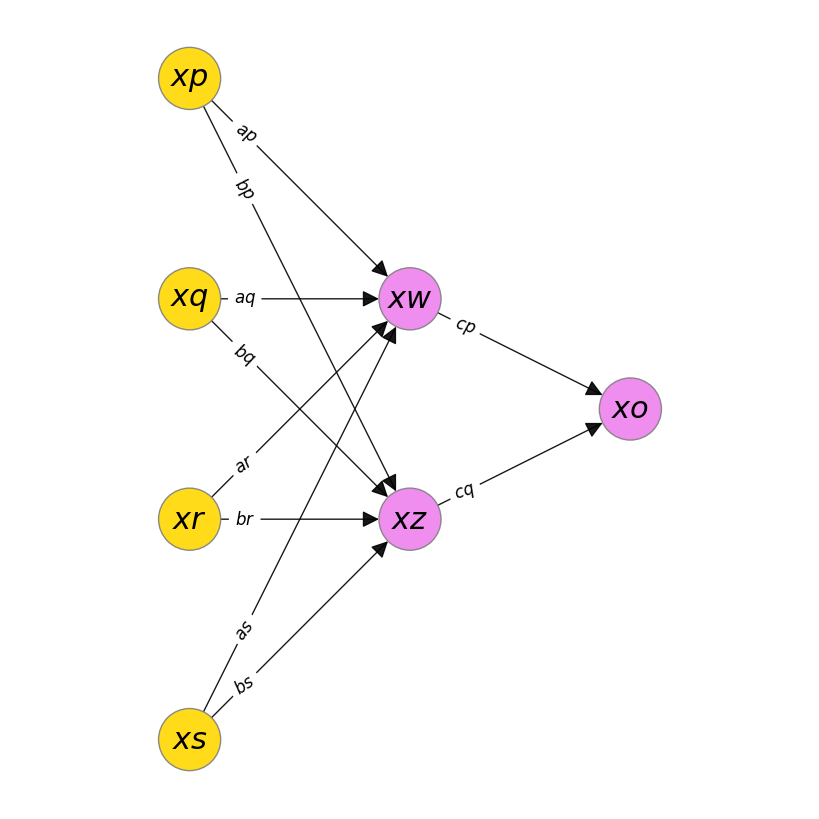

In [169]:
Loss_SGD_multi_neuron = run_SGD_m_multi_neuron(learning_rate=1e-3, mu = 0, training_iterations = 100000)

In [151]:
# Torchnn: change MSELoss reduction from 'sum' to 'mean'

class ComputationalGraphPrimer_Torchnn(ComputationalGraphPrimer):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    ############################# torch.nn based experiments for verification ############################
    def run_training_with_torchnn(self, option, training_data):
        
        class DataLoader:
            
            def __init__(self, training_data, batch_size):
                self.training_data = training_data
                self.batch_size = batch_size
                self.class_0_samples = [(item, 0) for item in self.training_data[0]]         ## Associate label 0 with each sample
                self.class_1_samples = [(item, 1) for item in self.training_data[1]]         ## Associate label 1 with each sample

            def __len__(self):
                return len(self.training_data[0]) + len(self.training_data[1])

            def _getitem(self):    
                cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                           ##   samples to be chosen randomly from the two lists
                if cointoss == 0:
                    return random.choice(self.class_0_samples)
                else:
                    return random.choice(self.class_1_samples)            

            def getbatch(self):
                batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                maxval = 0.0                                               ## For approximate batch data normalization
                for _ in range(self.batch_size):
                    item = self._getitem()
                    if np.max(item[0]) > maxval: 
                        maxval = np.max(item[0])
                    batch_data.append(item[0])
                    batch_labels.append(item[1])
                batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                batch = [batch_data, batch_labels]
                return batch                

        data_loader = DataLoader(training_data, batch_size=self.batch_size)

        class OneNeuronNet(torch.nn.Module):
            """
            This class is used when the parameter 'option' is set to 'one_neuron' in the call to
            this training function.
            """
            def __init__(self, D_in, D_out):
                torch.nn.Module.__init__( self )
                self.linear = torch.nn.Linear(D_in, D_out)
                self.sigmoid = torch.nn.Sigmoid()

            def forward(self, x):
                h_out = self.linear(x)
                y_pred = self.sigmoid(h_out)
                return y_pred

        class MultiNeuronNet(torch.nn.Module):
            """
            This class is used when the parameter 'option' is set to 'multi_neuron' in the call to
            this training function.
            """
            def __init__(self, D_in, H, D_out):
                torch.nn.Module.__init__( self )
                self.linear1 = torch.nn.Linear(D_in, H)
                self.linear2 = torch.nn.Linear(H, D_out)
            def forward(self, x):
                h_relu = self.linear1(x).clamp(min=0)
                y_pred = self.linear2(h_relu)
                return y_pred

        loss_running_record = []
        i = 0
        avg_loss_over_iterations = 0.0
        if option == 'one_neuron':
            N,D_in,D_out = self.batch_size,self.input_size,self.output_size
            model = OneNeuronNet(D_in,D_out)
        elif option == 'multi_neuron':
            N,D_in,H,D_out = self.batch_size,self.input_size,2,self.output_size
            model = MultiNeuronNet(D_in,H,D_out)
        else:
            sys.exit("\n\nThe value of the parameter 'option' not recognized\n\n")
#         criterion = torch.nn.MSELoss(reduction='sum')
        criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), self.learning_rate)
        for i in range(self.training_iterations):
            data = data_loader.getbatch()
            data_tuples = torch.FloatTensor( data[0] )
            class_labels = torch.FloatTensor( data[1] )
            # We need to convert the shape torch.Size([8]) into the shape torch.Size([8, 1]):
            class_labels = torch.unsqueeze(class_labels, 1)    
            y_preds = model(data_tuples)
            loss = criterion(y_preds, class_labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            avg_loss_over_iterations += loss.item()
            if i%(self.display_loss_how_often) == 0: 
                avg_loss_over_iterations /= self.display_loss_how_often
                loss_running_record.append(avg_loss_over_iterations)
#                 print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))
                avg_loss_over_iterations = 0.0
#         plt.figure()     
#         plt.plot(loss_running_record) 
#         plt.show()
        return loss_running_record
    ######################################################################################################

In [163]:
# run torchnn_verify for one and multi neuron

seed = 0           
random.seed(seed)
numpy.random.seed(seed)
torch.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

cgp = ComputationalGraphPrimer_Torchnn(
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],   # Only used to determine the data dimensionality
               dataset_size = 5000,
               learning_rate = 1e-3,             # For the one-neuron option below
#               learning_rate = 5 * 1e-2,         # Also for the one-neuron option below
               training_iterations = 100000,#40000,
               batch_size = 8,
               display_loss_how_often = 100,
               one_neuron_model= True
      )


##  This call is needed for generating the training data:
cgp.parse_expressions()                               

training_data = cgp.gen_training_data()

Loss_torchnn_one = cgp.run_training_with_torchnn('one_neuron', training_data)                  ## (A)

Loss_torchnn_multi = cgp.run_training_with_torchnn('multi_neuron', training_data)                 ## (B)

### Compare the results: adam is much better the result from SGD

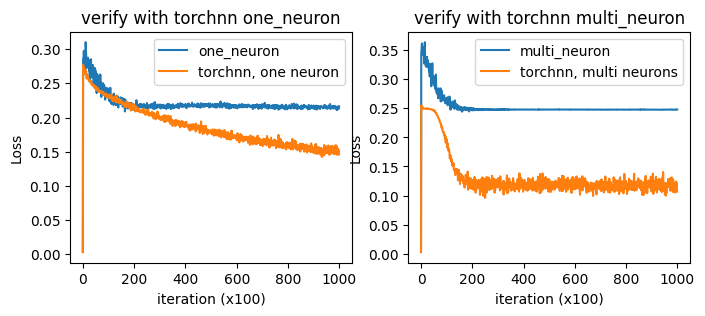

In [182]:
fig, axs = plt.subplots(1, 2, figsize = (8,3))

axs[0].plot(Loss_SGD_one_neuron, label = 'one_neuron')
axs[0].plot(Loss_torchnn_one, label = 'torchnn, one neuron')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('iteration (x100)')
axs[0].set_title('verify with torchnn one_neuron')
axs[0].legend()

axs[1].plot(Loss_SGD_multi_neuron, label = 'multi_neuron')
axs[1].plot(Loss_torchnn_multi, label = 'torchnn, multi neurons')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('iteration (x100)')
axs[1].set_title('verify with torchnn multi_neuron')
axs[1].legend()

## Task 2: one_neuron classifier implementation with SGD, SGD+, Adam

### Compare the loss with lr = 1e-3 and lr = 5e-4, in both case, Loss_Adam < Loss_SGD+ < Loss_SGD

In [184]:
# one neuron with momentum
def run_SGD_m_one_neuron(learning_rate, mu, training_iterations):
    
    class ComputationalGraphPrimer_SGD_m(ComputationalGraphPrimer):

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.v_former = {}
            self.v_former_bias = 0
            # set mu
            self.mu = mu


            self.loss_running_record = []

        def run_training_loop_one_neuron_model(self, training_data):
            
            self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

            self.bias = random.uniform(0,1)                   ## Adding the bias improves class discrimination.
                                                              ##   We initialize it to a random number.

            class DataLoader:
                
                def __init__(self, training_data, batch_size):
                    self.training_data = training_data
                    self.batch_size = batch_size
                    self.class_0_samples = [(item, 0) for item in self.training_data[0]]   ## Associate label 0 with each sample
                    self.class_1_samples = [(item, 1) for item in self.training_data[1]]   ## Associate label 1 with each sample

                def __len__(self):
                    return len(self.training_data[0]) + len(self.training_data[1])

                def _getitem(self):    
                    cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                               ##   samples to be chosen randomly from the two lists
                    if cointoss == 0:
                        return random.choice(self.class_0_samples)
                    else:
                        return random.choice(self.class_1_samples)            

                def getbatch(self):
                    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                    maxval = 0.0                                               ## For approximate batch data normalization
                    for _ in range(self.batch_size):
                        item = self._getitem()
                        if np.max(item[0]) > maxval: 
                            maxval = np.max(item[0])
                        batch_data.append(item[0])
                        batch_labels.append(item[1])
                    batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
                    batch = [batch_data, batch_labels]
                    return batch                


            data_loader = DataLoader(training_data, batch_size=self.batch_size)
            loss_running_record = []
            i = 0
            avg_loss_over_iterations = 0.0                                    ##  Average the loss over iterations for printing out 
                                                                               ##    every N iterations during the training loop.

            # initilize self.v_former
            for param in self.vals_for_learnable_params:
                self.v_former[param] = 0

            for i in range(self.training_iterations):
                data = data_loader.getbatch()
                data_tuples = data[0]
                class_labels = data[1]
                y_preds, deriv_sigmoids =  self.forward_prop_one_neuron_model(data_tuples)              ##  FORWARD PROP of data
                loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ##  Find loss
                loss_avg = loss / float(len(class_labels))                                              ##  Average the loss over batch
                avg_loss_over_iterations += loss_avg                          
                if i%(self.display_loss_how_often) == 0: 
                    avg_loss_over_iterations /= self.display_loss_how_often
                    loss_running_record.append(avg_loss_over_iterations)
    #                 print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                 ## Display average loss
                    avg_loss_over_iterations = 0.0                                                     ## Re-initialize avg loss
                y_errors = list(map(operator.sub, class_labels, y_preds))
                y_error_avg = sum(y_errors) / float(len(class_labels))
                deriv_sigmoid_avg = sum(deriv_sigmoids) / float(len(class_labels))
                data_tuple_avg = [sum(x) for x in zip(*data_tuples)]
                data_tuple_avg = list(map(operator.truediv, data_tuple_avg, 
                                         [float(len(class_labels))] * len(class_labels) ))
                self.backprop_and_update_params_one_neuron_model(y_error_avg, data_tuple_avg, deriv_sigmoid_avg)     ## BACKPROP loss

            self.loss_running_record = loss_running_record.copy()
    #         plt.figure()     
    #         plt.plot(loss_running_record) 
    #         plt.show()   


        def forward_prop_one_neuron_model(self, data_tuples_in_batch):
            
            output_vals = []
            deriv_sigmoids = []
            for vals_for_input_vars in data_tuples_in_batch:
                input_vars = self.independent_vars                   ## This is a list of vars for the input nodes. For the
                                                                     ##   the One-Neuron example in the Examples directory
                                                                     ##   this is just the list [xa, xb, xc, xd]
                vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))   ## The current values at input

                exp_obj = self.exp_objects[0]                        ## To understand this, first see the definition of the
                                                                     ##   Exp class (search for the string "class Exp").
                                                                     ##   Each expression that defines the neural network is
                                                                     ##   represented by one Exp instance by the parser.
                output_val = self.eval_expression(exp_obj.body , vals_for_input_vars_dict, self.vals_for_learnable_params)

                ## [Search for "self.bias" in this file.]  As mentioned earlier, adding bias improves class discrimination:
                output_val = output_val + self.bias

                output_val = 1.0 / (1.0 + np.exp(-1.0 * output_val))   ## Apply sigmoid activation (output confined to [0.0,1.0] interval) 

                deriv_sigmoid = output_val * (1.0 - output_val)        ## See Slide 59 for why we need partial deriv of Sigmoid at input point

                output_vals.append(output_val)                         ## Collect output values for different input samples in batch

                deriv_sigmoids.append(deriv_sigmoid)                   ## Collect the Sigmoid derivatives for each input sample in batch
                                                                       ##   The derivatives that are saved during forward prop are shown on Slide 59.
            return output_vals, deriv_sigmoids


        def backprop_and_update_params_one_neuron_model(self, y_error, vals_for_input_vars, deriv_sigmoid):
            input_vars = self.independent_vars
            vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))
            vals_for_learnable_params = self.vals_for_learnable_params
            for i,param in enumerate(self.vals_for_learnable_params):
                ## Calculate the next step in the parameter hyperplane
                ###################################################### Key ###############################################
                # step = self.learning_rate * y_error * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoid 
                v_t = y_error * vals_for_input_vars_dict[input_vars[i]] * deriv_sigmoid + self.mu * self.v_former[param]
                self.v_former[param] = v_t
                step = self.learning_rate * v_t
                
#                 v_t = self.learning_rate * y_error * vals_for_input_vars_dict[input_vars[i]] * deriv_sigmoid + self.mu * self.v_former[param]
#                 self.v_former[param] = v_t
#                 step = v_t

                ## Update the learnable parameters
                self.vals_for_learnable_params[param] += step
                
            ###################################################### Key ###############################################
            # self.bias += self.learning_rate * y_error * deriv_sigmoid    ## Update the bias
            v_t_bias = y_error * deriv_sigmoid + self.mu * self.v_former_bias
            self.v_former_bias = v_t_bias
            self.bias += self.learning_rate * v_t_bias

#             v_t_bias = self.learning_rate * y_error * deriv_sigmoid + self.mu * self.v_former_bias
#             self.v_former_bias = v_t_bias
#             self.bias += v_t_bias
        ######################################################################################################

    ######################################################################################################

    cgp = ComputationalGraphPrimer_SGD_m(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = learning_rate,
#                mu = mu,
#                learning_rate = 1e-3,
#               learning_rate = 5 * 1e-2,
               training_iterations = training_iterations, #100000,#40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

    cgp.parse_expressions()

    #cgp.display_network1()
    #cgp.display_network2()
    cgp.display_one_neuron_network()      

    training_data = cgp.gen_training_data()

    cgp.run_training_loop_one_neuron_model(training_data)

    loss_running_record_SGD_M = cgp.loss_running_record
    
    return loss_running_record_SGD_M

In [187]:
# Adam one_neuron
def run_adam_one_neuron(learning_rate, beta1, beta2, training_iterations):
    epsilon = 1e-10
    class ComputationalGraphPrimer_adam(ComputationalGraphPrimer):

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # set beta
            self.beta1 = beta1
            self.beta2 = beta2
            self.loss_running_record = []

        def run_training_loop_one_neuron_model(self, training_data):
            
            self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

            self.bias = random.uniform(0,1)                   ## Adding the bias improves class discrimination.
                                                              ##   We initialize it to a random number.

            class DataLoader:
                
                def __init__(self, training_data, batch_size):
                    self.training_data = training_data
                    self.batch_size = batch_size
                    self.class_0_samples = [(item, 0) for item in self.training_data[0]]   ## Associate label 0 with each sample
                    self.class_1_samples = [(item, 1) for item in self.training_data[1]]   ## Associate label 1 with each sample

                def __len__(self):
                    return len(self.training_data[0]) + len(self.training_data[1])

                def _getitem(self):    
                    cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                               ##   samples to be chosen randomly from the two lists
                    if cointoss == 0:
                        return random.choice(self.class_0_samples)
                    else:
                        return random.choice(self.class_1_samples)            

                def getbatch(self):
                    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                    maxval = 0.0                                               ## For approximate batch data normalization
                    for _ in range(self.batch_size):
                        item = self._getitem()
                        if np.max(item[0]) > maxval: 
                            maxval = np.max(item[0])
                        batch_data.append(item[0])
                        batch_labels.append(item[1])
                    batch_data = [item/maxval for item in batch_data]          ## Normalize batch data
                    batch = [batch_data, batch_labels]
                    return batch                


            data_loader = DataLoader(training_data, batch_size=self.batch_size)
            loss_running_record = []
            i = 0
            avg_loss_over_iterations = 0.0                                    ##  Average the loss over iterations for printing out 
                                                                               ##    every N iterations during the training loop.

            ###################################### key ###########################################    
            # initilize self.v_former
            self.v_t = {param:0 for param in self.vals_for_learnable_params}
            self.m_t = {param:0 for param in self.vals_for_learnable_params}
            self.v_t_bias = 0
            self.m_t_bias = 0
            
#             for param in self.vals_for_learnable_params:
#                 self.v_former[param] = 0

            for i in range(self.training_iterations):
                data = data_loader.getbatch()
                data_tuples = data[0]
                class_labels = data[1]
                y_preds, deriv_sigmoids =  self.forward_prop_one_neuron_model(data_tuples)              ##  FORWARD PROP of data
                loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ##  Find loss
                loss_avg = loss / float(len(class_labels))                                              ##  Average the loss over batch
                avg_loss_over_iterations += loss_avg                          
                if i%(self.display_loss_how_often) == 0: 
                    avg_loss_over_iterations /= self.display_loss_how_often
                    loss_running_record.append(avg_loss_over_iterations)
    #                 print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))                 ## Display average loss
                    avg_loss_over_iterations = 0.0                                                     ## Re-initialize avg loss
                y_errors = list(map(operator.sub, class_labels, y_preds))
                y_error_avg = sum(y_errors) / float(len(class_labels))
                deriv_sigmoid_avg = sum(deriv_sigmoids) / float(len(class_labels))
                data_tuple_avg = [sum(x) for x in zip(*data_tuples)]
                data_tuple_avg = list(map(operator.truediv, data_tuple_avg, 
                                         [float(len(class_labels))] * len(class_labels) ))
                self.backprop_and_update_params_one_neuron_model(y_error_avg, data_tuple_avg, deriv_sigmoid_avg, i)     ## BACKPROP loss

            self.loss_running_record = loss_running_record.copy()
    #         plt.figure()     
    #         plt.plot(loss_running_record) 
    #         plt.show()   


        def forward_prop_one_neuron_model(self, data_tuples_in_batch):
            
            output_vals = []
            deriv_sigmoids = []
            for vals_for_input_vars in data_tuples_in_batch:
                input_vars = self.independent_vars                   ## This is a list of vars for the input nodes. For the
                                                                     ##   the One-Neuron example in the Examples directory
                                                                     ##   this is just the list [xa, xb, xc, xd]
                vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))   ## The current values at input

                exp_obj = self.exp_objects[0]                        ## To understand this, first see the definition of the
                                                                     ##   Exp class (search for the string "class Exp").
                                                                     ##   Each expression that defines the neural network is
                                                                     ##   represented by one Exp instance by the parser.
                output_val = self.eval_expression(exp_obj.body , vals_for_input_vars_dict, self.vals_for_learnable_params)

                ## [Search for "self.bias" in this file.]  As mentioned earlier, adding bias improves class discrimination:
                output_val = output_val + self.bias

                output_val = 1.0 / (1.0 + np.exp(-1.0 * output_val))   ## Apply sigmoid activation (output confined to [0.0,1.0] interval) 

                deriv_sigmoid = output_val * (1.0 - output_val)        ## See Slide 59 for why we need partial deriv of Sigmoid at input point

                output_vals.append(output_val)                         ## Collect output values for different input samples in batch

                deriv_sigmoids.append(deriv_sigmoid)                   ## Collect the Sigmoid derivatives for each input sample in batch
                                                                       ##   The derivatives that are saved during forward prop are shown on Slide 59.
            return output_vals, deriv_sigmoids


        def backprop_and_update_params_one_neuron_model(self, y_error, vals_for_input_vars, deriv_sigmoid, iteration):
            input_vars = self.independent_vars
            vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))
            vals_for_learnable_params = self.vals_for_learnable_params
            # print(vals_for_input_vars_dict)
            for i,param in enumerate(self.vals_for_learnable_params):
                ## Calculate the next step in the parameter hyperplane
                ###################################################### Key ###############################################
                # step = self.learning_rate * y_error * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoid 
                g_t = y_error * vals_for_input_vars_dict[input_vars[i]] * deriv_sigmoid
                
                m_t = self.beta1 * self.m_t[param] + (1-self.beta1) * g_t
                v_t = self.beta2 * self.v_t[param] + (1-self.beta2) * (g_t**2)
                self.m_t[param] = m_t
                self.v_t[param] = v_t
                m_t_hat = m_t/(1-pow(self.beta1, iteration+1))
                v_t_hat = v_t/(1-pow(self.beta2, iteration+1))
                step = self.learning_rate * m_t_hat/((v_t_hat + epsilon)**0.5)

                ## Update the learnable parameters
                self.vals_for_learnable_params[param] += step                
                
#                 v_t = y_error * vals_for_input_vars_dict[input_vars[i]] * deriv_sigmoid + self.mu * self.v_t[param]
#                 self.v_t[param] = v_t
#                 step = self.learning_rate * v_t
                
#                 v_t = self.learning_rate * y_error * vals_for_input_vars_dict[input_vars[i]] * deriv_sigmoid + self.mu * self.v_former[param]
#                 self.v_former[param] = v_t
#                 step = v_t

                
            ###################################################### Key ###############################################
            # self.bias += self.learning_rate * y_error * deriv_sigmoid    ## Update the bias
            # step = self.learning_rate * y_error * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoid 
            g_t = y_error * deriv_sigmoid
            m_t = self.beta1 * self.m_t_bias + (1-self.beta1) * g_t
            v_t = self.beta2 * self.v_t_bias + (1-self.beta2) * (g_t**2)
            self.m_t_bias = m_t
            self.v_t_bias = v_t
            m_t_hat = m_t/(1-pow(self.beta1, iteration+1))
            v_t_hat = v_t/(1-pow(self.beta2, iteration+1))
            step = self.learning_rate * m_t_hat/((v_t_hat + epsilon)**0.5)

            ## Update the learnable parameters
            self.bias += step
            
#             v_t_bias = y_error * deriv_sigmoid + self.mu * self.v_t_bias
#             self.v_t_bias = v_t_bias
#             self.bias += self.learning_rate * v_t_bias

#             v_t_bias = self.learning_rate * y_error * deriv_sigmoid + self.mu * self.v_former_bias
#             self.v_former_bias = v_t_bias
#             self.bias += v_t_bias
        ######################################################################################################

    ######################################################################################################

    cgp = ComputationalGraphPrimer_adam(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = learning_rate,
#                mu = mu,
#                learning_rate = 1e-3,
#               learning_rate = 5 * 1e-2,
               training_iterations = training_iterations, #100000,#40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

    cgp.parse_expressions()

    #cgp.display_network1()
    #cgp.display_network2()
    cgp.display_one_neuron_network()      

    training_data = cgp.gen_training_data()

    cgp.run_training_loop_one_neuron_model(training_data)

    loss_running_record_SGD_M = cgp.loss_running_record
    
    return loss_running_record_SGD_M



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


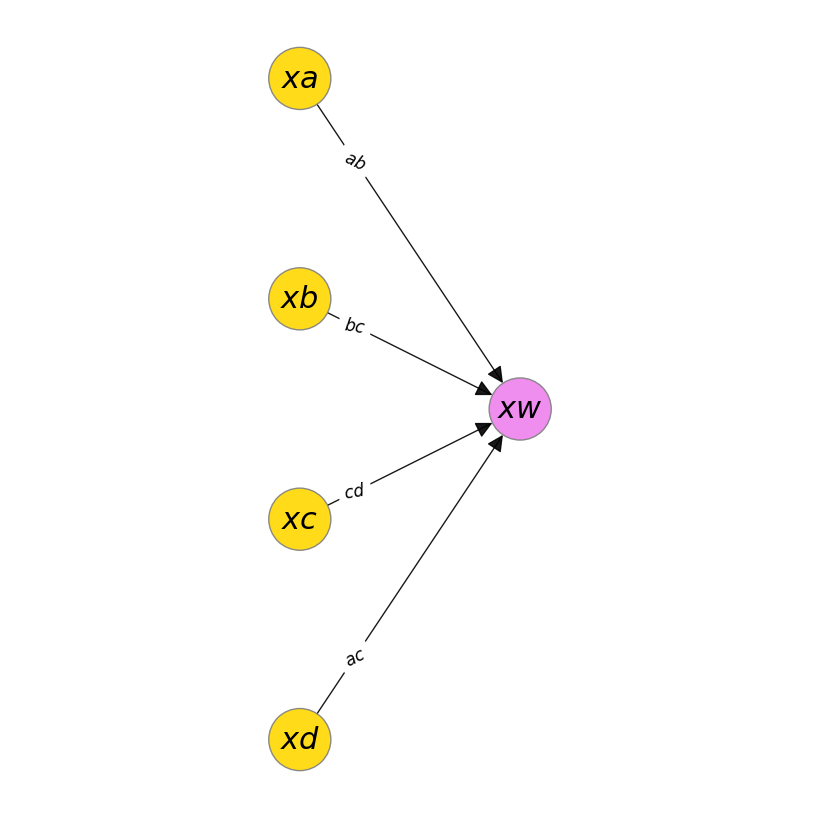



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


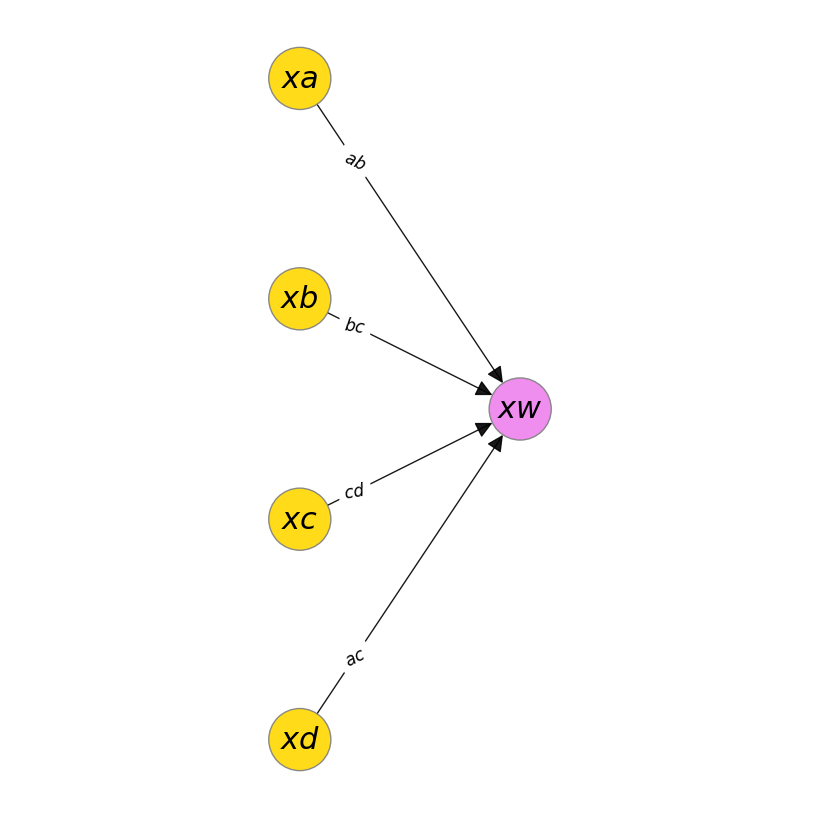



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


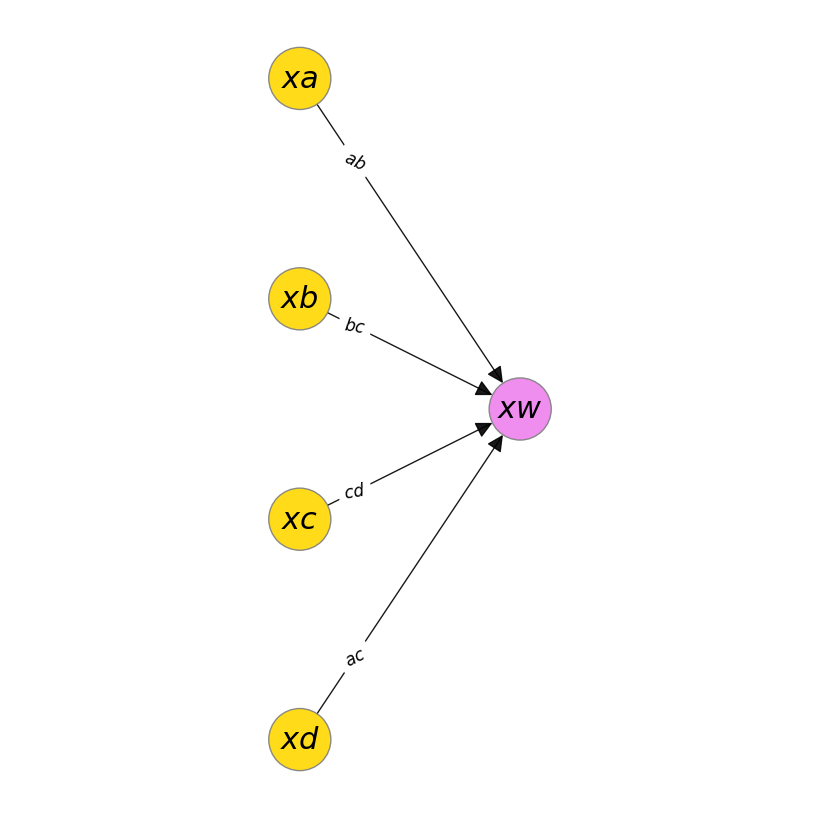

In [207]:
Loss_SGD_one_neuron_1 = run_SGD_m_one_neuron(learning_rate=1e-3, mu = 0, training_iterations = 100000)
Loss_SGD_m_one_neuron_1 = run_SGD_m_one_neuron(learning_rate=1e-3, mu = 0.95, training_iterations = 100000)
Loss_adam_one_neuron_1 = run_adam_one_neuron(learning_rate = 1e-3, beta1 = 0.99, beta2 = 0.999, training_iterations = 100000)



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


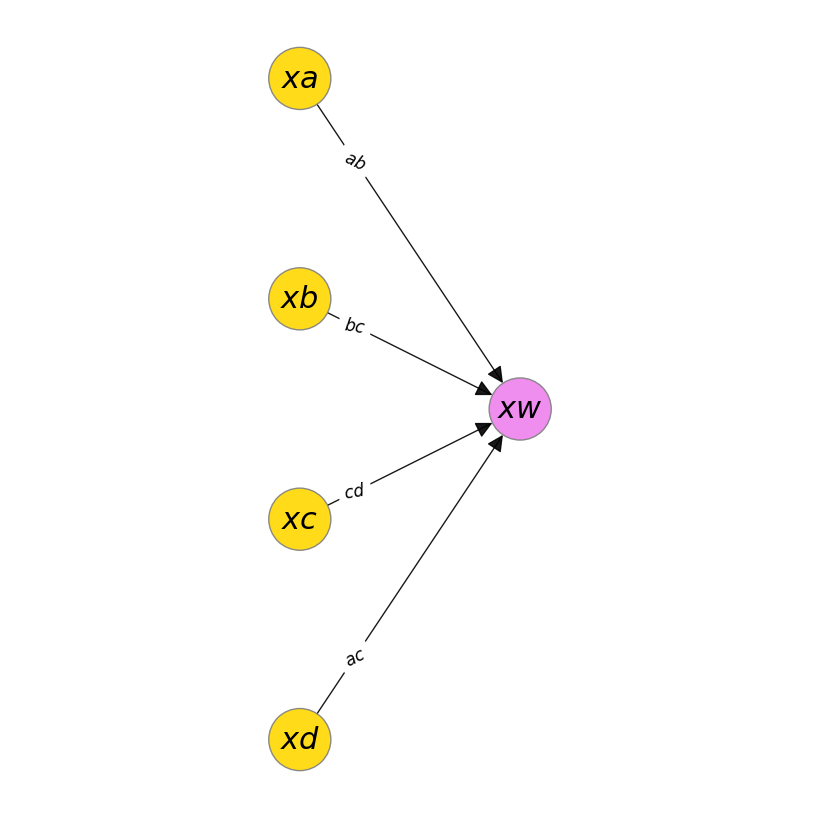



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


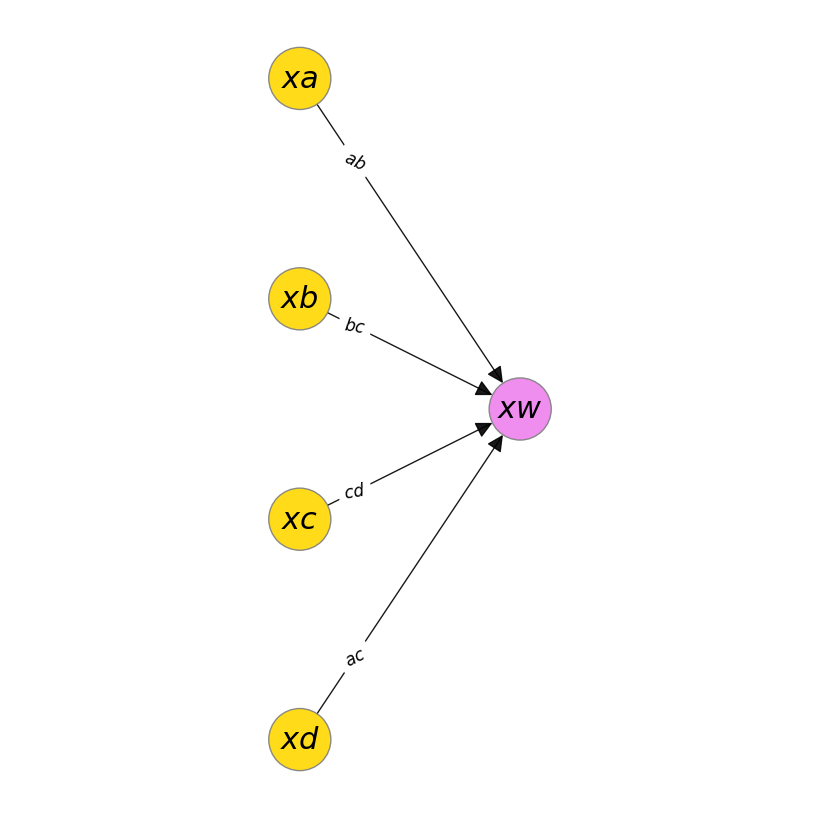



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


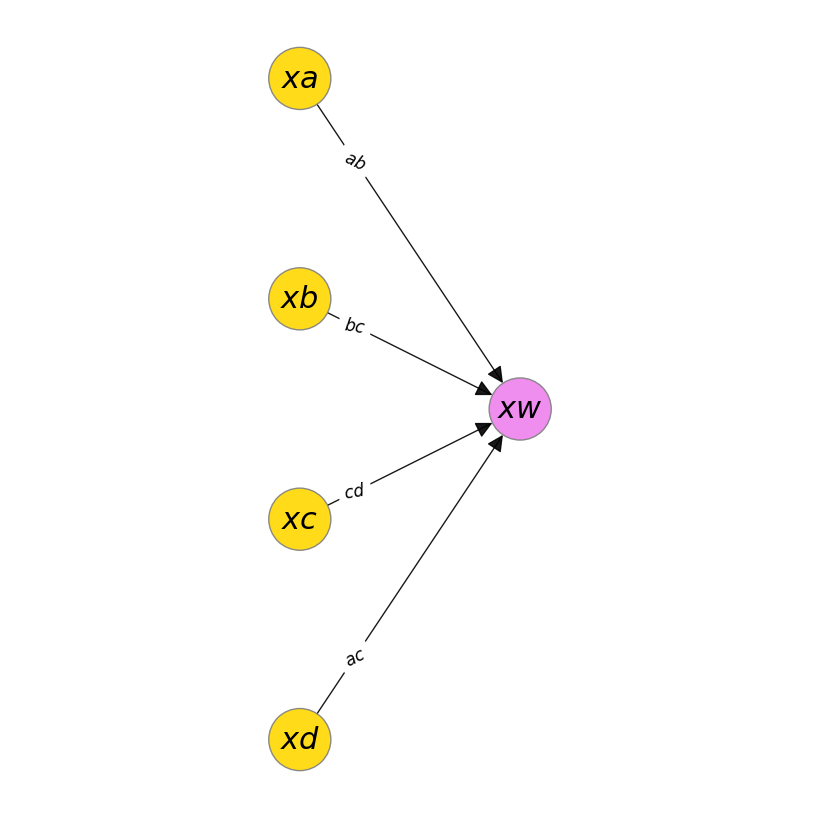

In [202]:
Loss_SGD_one_neuron_2 = run_SGD_m_one_neuron(learning_rate=2e-3, mu = 0, training_iterations = 100000)
Loss_SGD_m_one_neuron_2 = run_SGD_m_one_neuron(learning_rate=2e-3, mu = 0.95, training_iterations = 100000)
Loss_adam_one_neuron_2 = run_adam_one_neuron(learning_rate = 2e-3, beta1 = 0.99, beta2 = 0.999, training_iterations = 100000)



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


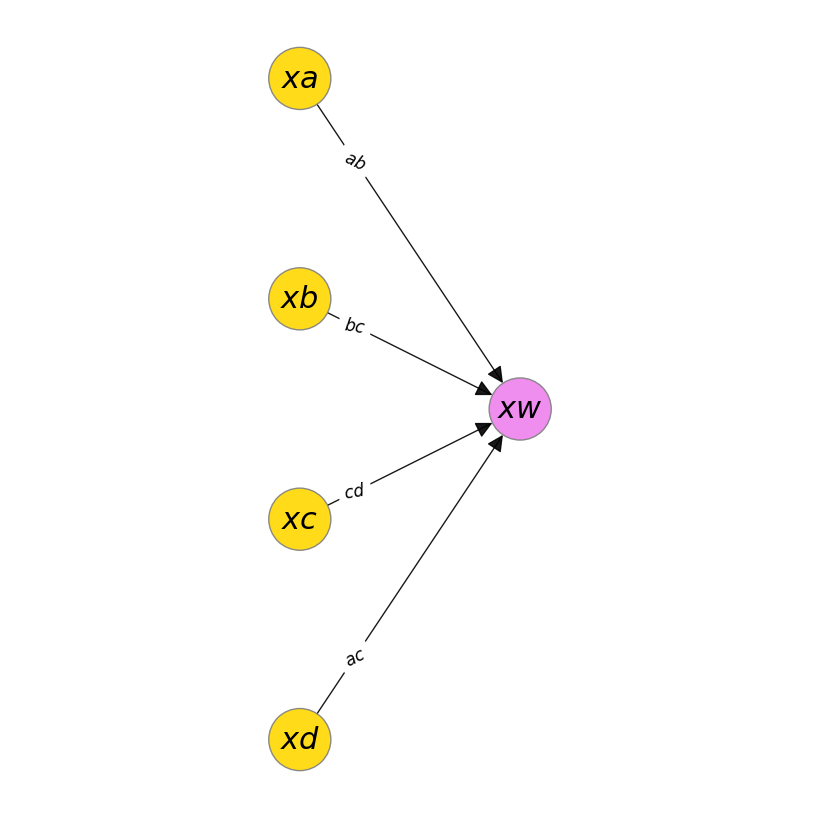



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


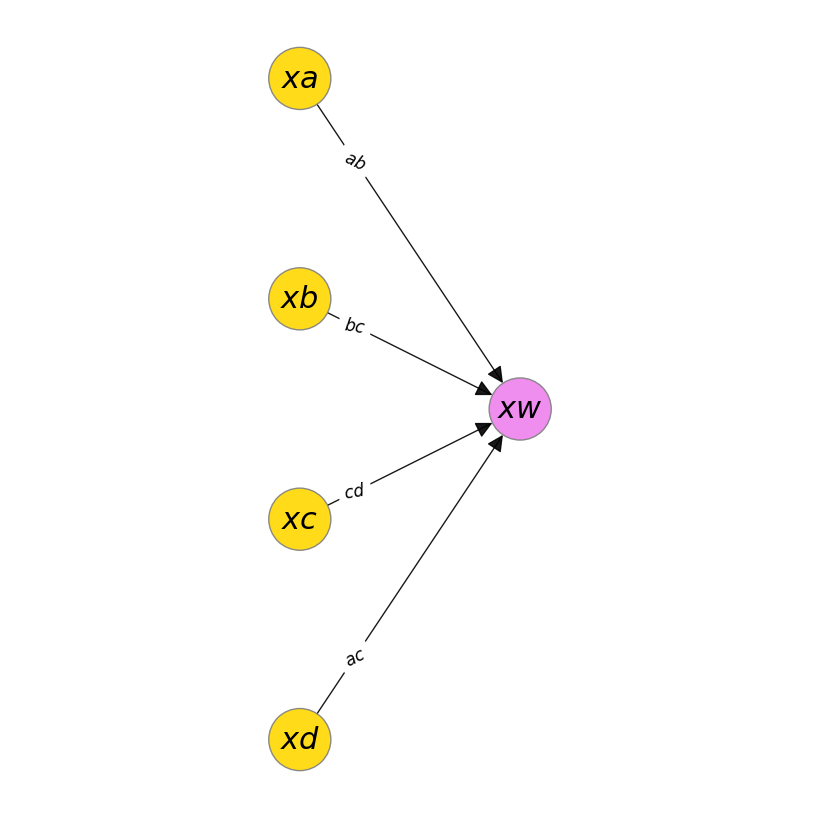



all variables: {'xd', 'xb', 'xw', 'xa', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xd', 'xb', 'xa', 'xc']


leads_to dictionary: {'xd': {'xw'}, 'xb': {'xw'}, 'xw': set(), 'xa': {'xw'}, 'xc': {'xw'}}


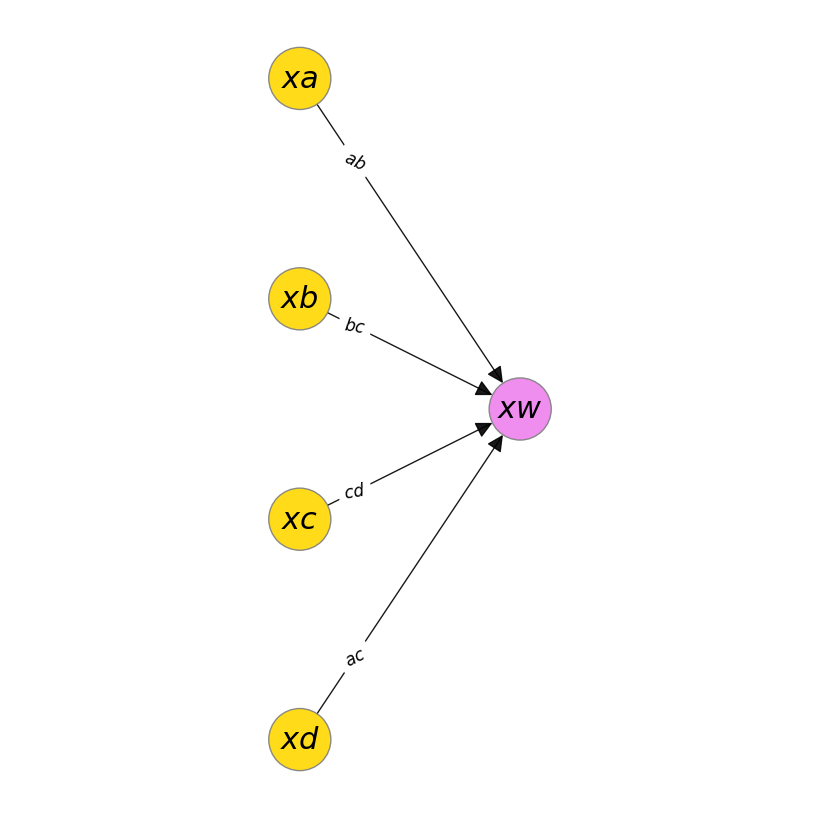

In [204]:
Loss_SGD_one_neuron_3 = run_SGD_m_one_neuron(learning_rate=5e-4, mu = 0, training_iterations = 100000)
Loss_SGD_m_one_neuron_3 = run_SGD_m_one_neuron(learning_rate=5e-4, mu = 0.95, training_iterations = 100000)
Loss_adam_one_neuron_3 = run_adam_one_neuron(learning_rate = 5e-4, beta1 = 0.99, beta2 = 0.999, training_iterations = 100000)

## Compare SGD, SGD+, Adam for one_neuron implementation

### Compare the loss with lr = 1e-3 and lr = 5e-4, in both case, Loss_Adam < Loss_SGD+ < Loss_SGD

- We can easily notice that the loss of Adam and SGD+ are smaller than the loss of SGD. Adam and SGD+ can reach a low loss level very quickly at the beginning. Adam and SGD+ can outperform SGD with much less interation number. 
- The Loss of Adam is smaller than SDG+. This difference is more significant when the learning rates are small. 

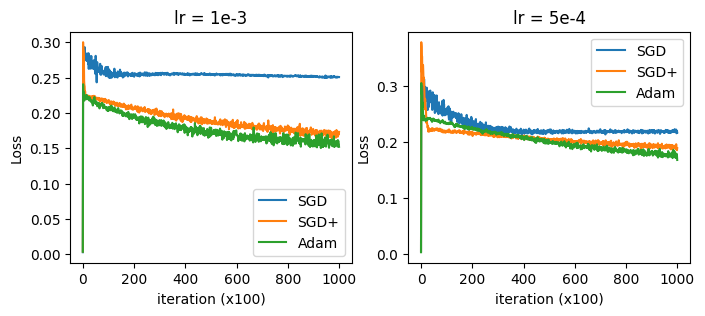

In [206]:
fig, axs = plt.subplots(1, 2, figsize = (8,3))

axs[0].plot(Loss_SGD_one_neuron_1, label = 'SGD')
axs[0].plot(Loss_SGD_m_one_neuron_1, label = 'SGD+')
axs[0].plot(Loss_adam_one_neuron_1, label = 'Adam')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('iteration (x100)')
axs[0].set_title('lr = 1e-3')
axs[0].legend()

axs[1].plot(Loss_SGD_one_neuron_3, label = 'SGD')
axs[1].plot(Loss_SGD_m_one_neuron_3, label = 'SGD+')
axs[1].plot(Loss_adam_one_neuron_3, label = 'Adam')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('iteration (x100)')
axs[1].set_title('lr = 5e-4')
axs[1].legend()

## Task 3: multi_neuron classifier implementation with SGD, SGD+, Adam

### Compare the loss with lr = 1e-3 and lr = 5e-4, in both case, Loss_Adam < Loss_SGD+ < Loss_SGD

In [208]:
# SGD+ for multi_neuron
def run_SGD_m_multi_neuron(learning_rate, mu, training_iterations):
    
    class ComputationalGraphPrimer_SGD_m(ComputationalGraphPrimer):

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # self.v_former = {}
            # self.v_former_bias = []
            # set mu
            self.mu = mu
            # return the loss
            self.loss_running_record = []
            
        ######################################################################################################
        ######################################## multi neuron model ##########################################

        def run_training_loop_multi_neuron_model(self, training_data):

            class DataLoader:
                
                def __init__(self, training_data, batch_size):
                    self.training_data = training_data
                    self.batch_size = batch_size
                    self.class_0_samples = [(item, 0) for item in self.training_data[0]]    ## Associate label 0 with each sample
                    self.class_1_samples = [(item, 1) for item in self.training_data[1]]    ## Associate label 1 with each sample

                def __len__(self):
                    return len(self.training_data[0]) + len(self.training_data[1])

                def _getitem(self):    
                    cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                               ##   samples to be chosen randomly from the two lists
                    if cointoss == 0:
                        return random.choice(self.class_0_samples)
                    else:
                        return random.choice(self.class_1_samples)            

                def getbatch(self):
                    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                    maxval = 0.0                                               ## For approximate batch data normalization
                    for _ in range(self.batch_size):
                        item = self._getitem()
                        if np.max(item[0]) > maxval: 
                            maxval = np.max(item[0])
                        batch_data.append(item[0])
                        batch_labels.append(item[1])
                    batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                    batch = [batch_data, batch_labels]
                    return batch                


            self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

            self.bias = [random.uniform(0,1) for _ in range(self.num_layers-1)]      ## Adding the bias to each layer improves 
                                                                                     ##   class discrimination. We initialize it 
                                                                                    ##   to a random number.
            self.v_t_bias = [0 for _ in range(self.num_layers-1)]
            self.v_t = {param: 0 for param in self.learnable_params}

            data_loader = DataLoader(training_data, batch_size=self.batch_size)
            loss_running_record = []
            i = 0
            avg_loss_over_iterations = 0.0                                          ##  Average the loss over iterations for printing out 
                                                                                     ##    every N iterations during the training loop.   
            for i in range(self.training_iterations):
                data = data_loader.getbatch()
                data_tuples = data[0]
                class_labels = data[1]
                self.forward_prop_multi_neuron_model(data_tuples)                                  ## FORW PROP works by side-effect 
                predicted_labels_for_batch = self.forw_prop_vals_at_layers[self.num_layers-1]      ## Predictions from FORW PROP
                y_preds =  [item for sublist in  predicted_labels_for_batch  for item in sublist]  ## Get numeric vals for predictions
                loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ## Calculate loss for batch
                loss_avg = loss / float(len(class_labels))                                         ## Average the loss over batch
                avg_loss_over_iterations += loss_avg                                              ## Add to Average loss over iterations
                if i%(self.display_loss_how_often) == 0: 
                    avg_loss_over_iterations /= self.display_loss_how_often
                    loss_running_record.append(avg_loss_over_iterations)
    #                 print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))            ## Display avg loss
                    avg_loss_over_iterations = 0.0                                                ## Re-initialize avg-over-iterations loss
                y_errors = list(map(operator.sub, class_labels, y_preds))
                y_error_avg = sum(y_errors) / float(len(class_labels))
                self.backprop_and_update_params_multi_neuron_model(y_error_avg, class_labels)      ## BACKPROP loss

            self.loss_running_record = loss_running_record
    #         plt.figure()     
    #         plt.plot(loss_running_record) 
    #         plt.show()   


        def forward_prop_multi_neuron_model(self, data_tuples_in_batch):
            
            self.forw_prop_vals_at_layers = {i : [] for i in range(self.num_layers)}   
            self.gradient_vals_for_layers = {i : [] for i in range(1, self.num_layers)}
            for vals_for_input_vars in data_tuples_in_batch:
                self.forw_prop_vals_at_layers[0].append(vals_for_input_vars)
                for layer_index in range(1, self.num_layers):
                    input_vars = self.layer_vars[layer_index-1]
                    if layer_index == 1:
                        vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))
                    output_vals_arr = []
                    gradients_val_arr = []
                    ##  In the following loop for forward propagation calculations, exp_obj is the Exp object
                    ##  that is created for each user-supplied expression that specifies the network.  See the
                    ##  definition of the class Exp (for 'Expression') by searching for "class Exp":
                    for exp_obj in self.layer_exp_objects[layer_index]:
                        output_val = self.eval_expression(exp_obj.body , vals_for_input_vars_dict,    
                                                                     self.vals_for_learnable_params, input_vars)
                        ## [Search for "self.bias" in this file.]  As mentioned earlier, adding bias to each 
                        ##  layer improves class discrimination:
                        output_val = output_val + self.bias[layer_index-1]                
                        ## apply sigmoid activation:
                        output_val = 1.0 / (1.0 + np.exp(-1.0 * output_val))
                        output_vals_arr.append(output_val)
                        ## calculate partial of the activation function as a function of its input
                        deriv_sigmoid = output_val * (1.0 - output_val)
                        gradients_val_arr.append(deriv_sigmoid)
                        vals_for_input_vars_dict[ exp_obj.dependent_var ] = output_val
                    self.forw_prop_vals_at_layers[layer_index].append(output_vals_arr)
                    ##  See the bullets in red on Slides 70 and 73 of my Week 3 slides for what needs
                    ##  to be stored during the forward propagation of data through the network:
                    self.gradient_vals_for_layers[layer_index].append(gradients_val_arr)


        def backprop_and_update_params_multi_neuron_model(self, y_error, class_labels):
            
            # backproped prediction error:
            pred_err_backproped_at_layers = {i : [] for i in range(1,self.num_layers-1)}  
            pred_err_backproped_at_layers[self.num_layers-1] = [y_error]
            
            for back_layer_index in reversed(range(1,self.num_layers)):
                input_vals = self.forw_prop_vals_at_layers[back_layer_index -1]
                input_vals_avg = [sum(x) for x in zip(*input_vals)]
                input_vals_avg = list(map(operator.truediv, input_vals_avg, [float(len(class_labels))] * len(class_labels)))
                deriv_sigmoid =  self.gradient_vals_for_layers[back_layer_index]
                deriv_sigmoid_avg = [sum(x) for x in zip(*deriv_sigmoid)]
                deriv_sigmoid_avg = list(map(operator.truediv, deriv_sigmoid_avg, 
                                                                 [float(len(class_labels))] * len(class_labels)))
                vars_in_layer  =  self.layer_vars[back_layer_index]                 ## a list like ['xo']
                vars_in_next_layer_back  =  self.layer_vars[back_layer_index - 1]   ## a list like ['xw', 'xz']

                layer_params = self.layer_params[back_layer_index]         
                ## note that layer_params are stored in a dict like        
                    ##     {1: [['ap', 'aq', 'ar', 'as'], ['bp', 'bq', 'br', 'bs']], 2: [['cp', 'cq']]}
                ## "layer_params[idx]" is a list of lists for the link weights in layer whose output nodes are in layer "idx"
                transposed_layer_params = list(zip(*layer_params))         ## creating a transpose of the link matrix

                backproped_error = [None] * len(vars_in_next_layer_back)
                for k,varr in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        backproped_error[k] = sum([self.vals_for_learnable_params[transposed_layer_params[k][i]] * 
                                                   pred_err_backproped_at_layers[back_layer_index][i] 
                                                   for i in range(len(vars_in_layer))])
    #                                               deriv_sigmoid_avg[i] for i in range(len(vars_in_layer))])
                pred_err_backproped_at_layers[back_layer_index - 1]  =  backproped_error
                input_vars_to_layer = self.layer_vars[back_layer_index-1]
                
                for j,var in enumerate(vars_in_layer):
                    layer_params = self.layer_params[back_layer_index][j]
                    ##  Regarding the parameter update loop that follows, see the Slides 74 through 77 of my Week 3 
                    ##  lecture slides for how the parameters are updated using the partial derivatives stored away 
                    ##  during forward propagation of data. The theory underlying these calculations is presented 
                    ##  in Slides 68 through 71. 
                    for i,param in enumerate(layer_params):
#                         gradient_of_loss_for_param = input_vals_avg[i] * pred_err_backproped_at_layers[back_layer_index][j] 
#                         step = self.learning_rate * gradient_of_loss_for_param * deriv_sigmoid_avg[j] 
#                         self.vals_for_learnable_params[param] += step
#                         print(self.vals_for_learnable_params, gradient_of_loss_for_param, deriv_sigmoid_avg[j] )

                        ###################################################### Key ###############################################
                        gradient_of_loss_for_param = input_vals_avg[i] * pred_err_backproped_at_layers[back_layer_index][j] * deriv_sigmoid_avg[j] 
#                         print('gradient_of_loss_for_param,',gradient_of_loss_for_param)
                        v_t = gradient_of_loss_for_param + self.mu * self.v_t[param]
#                         print('v_t,',v_t)
                        self.v_t[param] = v_t
                
                        step = self.learning_rate * v_t
                        self.vals_for_learnable_params[param] += step
                        
#                 self.bias[back_layer_index-1] += self.learning_rate * sum(pred_err_backproped_at_layers[back_layer_index]) \
#                                                                                * sum(deriv_sigmoid_avg)/len(deriv_sigmoid_avg)
                ###################################################### Key ###############################################
                v_t_bias = self.mu*self.v_t_bias[back_layer_index-1] + sum(pred_err_backproped_at_layers[back_layer_index]) * sum(deriv_sigmoid_avg)/len(deriv_sigmoid_avg)
                self.v_t_bias[back_layer_index-1] = v_t_bias
                self.bias[back_layer_index-1] += self.learning_rate * v_t_bias
        ######################################################################################################

    
    seed = 0           
    random.seed(seed)
    numpy.random.seed(seed)
    
    cgp = ComputationalGraphPrimer_SGD_m(
                   num_layers = 3,
                   layers_config = [4,2,1],                         # num of nodes in each layer
                   expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                                  'xz=bp*xp+bq*xq+br*xr+bs*xs',
                                  'xo=cp*xw+cq*xz'],
                   output_vars = ['xo'],
                   dataset_size = 5000,
                   learning_rate = learning_rate,
    #               learning_rate = 5 * 1e-2,
                   training_iterations = training_iterations, #100000,#40000,
                   batch_size = 8,
                   display_loss_how_often = 100,
                   debug = True,
          )

    cgp.parse_multi_layer_expressions()

    #cgp.display_network1()
    #cgp.display_network2()
    cgp.display_multi_neuron_network()   

    training_data = cgp.gen_training_data()

    cgp.run_training_loop_multi_neuron_model( training_data )

    return cgp.loss_running_record

In [210]:
# Adam multi_neuron
def run_adam_multi_neuron(learning_rate, beta1, beta2, training_iterations):
    epsilon = 1e-10
    class ComputationalGraphPrimer_adam(ComputationalGraphPrimer):

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # return the loss
            self.loss_running_record = []
            self.beta1 = beta1
            self.beta2 = beta2
            
        ######################################################################################################
        ######################################## multi neuron model ##########################################

        def run_training_loop_multi_neuron_model(self, training_data):

            class DataLoader:
                
                def __init__(self, training_data, batch_size):
                    self.training_data = training_data
                    self.batch_size = batch_size
                    self.class_0_samples = [(item, 0) for item in self.training_data[0]]    ## Associate label 0 with each sample
                    self.class_1_samples = [(item, 1) for item in self.training_data[1]]    ## Associate label 1 with each sample

                def __len__(self):
                    return len(self.training_data[0]) + len(self.training_data[1])

                def _getitem(self):    
                    cointoss = random.choice([0,1])                            ## When a batch is created by getbatch(), we want the
                                                                               ##   samples to be chosen randomly from the two lists
                    if cointoss == 0:
                        return random.choice(self.class_0_samples)
                    else:
                        return random.choice(self.class_1_samples)            

                def getbatch(self):
                    batch_data,batch_labels = [],[]                            ## First list for samples, the second for labels
                    maxval = 0.0                                               ## For approximate batch data normalization
                    for _ in range(self.batch_size):
                        item = self._getitem()
                        if np.max(item[0]) > maxval: 
                            maxval = np.max(item[0])
                        batch_data.append(item[0])
                        batch_labels.append(item[1])
                    batch_data = [item/maxval for item in batch_data]          ## Normalize batch data       
                    batch = [batch_data, batch_labels]
                    return batch                
                
            self.vals_for_learnable_params = {param: random.uniform(0,1) for param in self.learnable_params}

            self.bias = [random.uniform(0,1) for _ in range(self.num_layers-1)]      ## Adding the bias to each layer improves 
                                                                                     ##   class discrimination. We initialize it 
                                                                                    ##   to a random number.
            self.v_t_bias = [0 for _ in range(self.num_layers-1)]
            self.m_t_bias = [0 for _ in range(self.num_layers-1)]
            self.v_t = {param: 0 for param in self.learnable_params}
            self.m_t = {param: 0 for param in self.learnable_params}

            data_loader = DataLoader(training_data, batch_size=self.batch_size)
            loss_running_record = []
            i = 0
            avg_loss_over_iterations = 0.0                                          ##  Average the loss over iterations for printing out 
                                                                                     ##    every N iterations during the training loop.   
            for i in range(self.training_iterations):
                data = data_loader.getbatch()
                data_tuples = data[0]
                class_labels = data[1]
                self.forward_prop_multi_neuron_model(data_tuples)                                  ## FORW PROP works by side-effect 
                predicted_labels_for_batch = self.forw_prop_vals_at_layers[self.num_layers-1]      ## Predictions from FORW PROP
                y_preds =  [item for sublist in  predicted_labels_for_batch  for item in sublist]  ## Get numeric vals for predictions
                loss = sum([(abs(class_labels[i] - y_preds[i]))**2 for i in range(len(class_labels))])  ## Calculate loss for batch
                loss_avg = loss / float(len(class_labels))                                         ## Average the loss over batch
                avg_loss_over_iterations += loss_avg                                              ## Add to Average loss over iterations
                if i%(self.display_loss_how_often) == 0: 
                    avg_loss_over_iterations /= self.display_loss_how_often
                    loss_running_record.append(avg_loss_over_iterations)
    #                 print("[iter=%d]  loss = %.4f" %  (i+1, avg_loss_over_iterations))            ## Display avg loss
                    avg_loss_over_iterations = 0.0                                                ## Re-initialize avg-over-iterations loss
                y_errors = list(map(operator.sub, class_labels, y_preds))
                y_error_avg = sum(y_errors) / float(len(class_labels))
                self.backprop_and_update_params_multi_neuron_model(y_error_avg, class_labels, i)      ## BACKPROP loss

            self.loss_running_record = loss_running_record
    #         plt.figure()     
    #         plt.plot(loss_running_record) 
    #         plt.show()   


        def forward_prop_multi_neuron_model(self, data_tuples_in_batch):
            
            self.forw_prop_vals_at_layers = {i : [] for i in range(self.num_layers)}   
            self.gradient_vals_for_layers = {i : [] for i in range(1, self.num_layers)}
            for vals_for_input_vars in data_tuples_in_batch:
                self.forw_prop_vals_at_layers[0].append(vals_for_input_vars)
                for layer_index in range(1, self.num_layers):
                    input_vars = self.layer_vars[layer_index-1]
                    if layer_index == 1:
                        vals_for_input_vars_dict =  dict(zip(input_vars, list(vals_for_input_vars)))
                    output_vals_arr = []
                    gradients_val_arr = []
                    ##  In the following loop for forward propagation calculations, exp_obj is the Exp object
                    ##  that is created for each user-supplied expression that specifies the network.  See the
                    ##  definition of the class Exp (for 'Expression') by searching for "class Exp":
                    for exp_obj in self.layer_exp_objects[layer_index]:
                        output_val = self.eval_expression(exp_obj.body , vals_for_input_vars_dict,    
                                                                     self.vals_for_learnable_params, input_vars)
                        ## [Search for "self.bias" in this file.]  As mentioned earlier, adding bias to each 
                        ##  layer improves class discrimination:
                        output_val = output_val + self.bias[layer_index-1]                
                        ## apply sigmoid activation:
                        output_val = 1.0 / (1.0 + np.exp(-1.0 * output_val))
                        output_vals_arr.append(output_val)
                        ## calculate partial of the activation function as a function of its input
                        deriv_sigmoid = output_val * (1.0 - output_val)
                        gradients_val_arr.append(deriv_sigmoid)
                        vals_for_input_vars_dict[ exp_obj.dependent_var ] = output_val
                    self.forw_prop_vals_at_layers[layer_index].append(output_vals_arr)
                    ##  See the bullets in red on Slides 70 and 73 of my Week 3 slides for what needs
                    ##  to be stored during the forward propagation of data through the network:
                    self.gradient_vals_for_layers[layer_index].append(gradients_val_arr)


        def backprop_and_update_params_multi_neuron_model(self, y_error, class_labels, iteration):
            
            # backproped prediction error:
            pred_err_backproped_at_layers = {i : [] for i in range(1,self.num_layers-1)}  
            pred_err_backproped_at_layers[self.num_layers-1] = [y_error]
            
            for back_layer_index in reversed(range(1,self.num_layers)):
                input_vals = self.forw_prop_vals_at_layers[back_layer_index -1]
                input_vals_avg = [sum(x) for x in zip(*input_vals)]
                input_vals_avg = list(map(operator.truediv, input_vals_avg, [float(len(class_labels))] * len(class_labels)))
                deriv_sigmoid =  self.gradient_vals_for_layers[back_layer_index]
                deriv_sigmoid_avg = [sum(x) for x in zip(*deriv_sigmoid)]
                deriv_sigmoid_avg = list(map(operator.truediv, deriv_sigmoid_avg, 
                                                                 [float(len(class_labels))] * len(class_labels)))
                vars_in_layer  =  self.layer_vars[back_layer_index]                 ## a list like ['xo']
                vars_in_next_layer_back  =  self.layer_vars[back_layer_index - 1]   ## a list like ['xw', 'xz']

                layer_params = self.layer_params[back_layer_index]         
                ## note that layer_params are stored in a dict like        
                    ##     {1: [['ap', 'aq', 'ar', 'as'], ['bp', 'bq', 'br', 'bs']], 2: [['cp', 'cq']]}
                ## "layer_params[idx]" is a list of lists for the link weights in layer whose output nodes are in layer "idx"
                transposed_layer_params = list(zip(*layer_params))         ## creating a transpose of the link matrix

                backproped_error = [None] * len(vars_in_next_layer_back)
                for k,varr in enumerate(vars_in_next_layer_back):
                    for j,var2 in enumerate(vars_in_layer):
                        backproped_error[k] = sum([self.vals_for_learnable_params[transposed_layer_params[k][i]] * 
                                                   pred_err_backproped_at_layers[back_layer_index][i] 
                                                   for i in range(len(vars_in_layer))])
    #                                               deriv_sigmoid_avg[i] for i in range(len(vars_in_layer))])
                pred_err_backproped_at_layers[back_layer_index - 1]  =  backproped_error
                input_vars_to_layer = self.layer_vars[back_layer_index-1]
                
                for j,var in enumerate(vars_in_layer):
                    layer_params = self.layer_params[back_layer_index][j]
                    ##  Regarding the parameter update loop that follows, see the Slides 74 through 77 of my Week 3 
                    ##  lecture slides for how the parameters are updated using the partial derivatives stored away 
                    ##  during forward propagation of data. The theory underlying these calculations is presented 
                    ##  in Slides 68 through 71. 
                    for i,param in enumerate(layer_params):
#                         gradient_of_loss_for_param = input_vals_avg[i] * pred_err_backproped_at_layers[back_layer_index][j] 
#                         step = self.learning_rate * gradient_of_loss_for_param * deriv_sigmoid_avg[j] 
#                         self.vals_for_learnable_params[param] += step
#                         print(self.vals_for_learnable_params, gradient_of_loss_for_param, deriv_sigmoid_avg[j] )

                        ###################################################### Key ###############################################
                        ###################################################### Key ###############################################
                        # step = self.learning_rate * y_error * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoid 
                        g_t = input_vals_avg[i] * pred_err_backproped_at_layers[back_layer_index][j] * deriv_sigmoid_avg[j] 

                        m_t = self.beta1 * self.m_t[param] + (1-self.beta1) * g_t
                        v_t = self.beta2 * self.v_t[param] + (1-self.beta2) * (g_t**2)
                        self.m_t[param] = m_t
                        self.v_t[param] = v_t
                        m_t_hat = m_t/(1-pow(self.beta1, iteration+1))
                        v_t_hat = v_t/(1-pow(self.beta2, iteration+1))
                        step = self.learning_rate * m_t_hat/((v_t_hat + epsilon)**0.5)

                        ## Update the learnable parameters
                        self.vals_for_learnable_params[param] += step
    
    
#                         gradient_of_loss_for_param = input_vals_avg[i] * pred_err_backproped_at_layers[back_layer_index][j] * deriv_sigmoid_avg[j] 
#                         v_t = gradient_of_loss_for_param + self.mu * self.v_t[param]
#                         self.v_t[param] = v_t
                
#                         step = self.learning_rate * v_t
#                         self.vals_for_learnable_params[param] += step
                        
#                 self.bias[back_layer_index-1] += self.learning_rate * sum(pred_err_backproped_at_layers[back_layer_index]) \
#                                                                                * sum(deriv_sigmoid_avg)/len(deriv_sigmoid_avg)
                ###################################################### Key ###############################################
                ###################################################### Key ###############################################
                # self.bias += self.learning_rate * y_error * deriv_sigmoid    ## Update the bias
                # step = self.learning_rate * y_error * vals_for_input_vars_dict[param_to_vars_map[param]] * deriv_sigmoid 
                g_t = sum(pred_err_backproped_at_layers[back_layer_index]) * sum(deriv_sigmoid_avg)/len(deriv_sigmoid_avg)
                
                m_t = self.beta1 * self.m_t_bias[back_layer_index-1] + (1-self.beta1) * g_t
                v_t = self.beta2 * self.v_t_bias[back_layer_index-1] + (1-self.beta2) * (g_t**2)
                self.m_t_bias[back_layer_index-1] = m_t
                self.v_t_bias[back_layer_index-1] = v_t
                m_t_hat = m_t/(1-pow(self.beta1, iteration+1))
                v_t_hat = v_t/(1-pow(self.beta2, iteration+1))
                step = self.learning_rate * m_t_hat/((v_t_hat + epsilon)**0.5)

                ## Update the learnable parameters
                self.bias += step
        
                
#                 v_t_bias = self.mu*self.v_t_bias[back_layer_index-1] + sum(pred_err_backproped_at_layers[back_layer_index]) * sum(deriv_sigmoid_avg)/len(deriv_sigmoid_avg)
#                 self.v_t_bias[back_layer_index-1] = v_t_bias
#                 self.bias[back_layer_index-1] += self.learning_rate * v_t_bias
        ######################################################################################################

    
    seed = 0           
    random.seed(seed)
    numpy.random.seed(seed)
    
    cgp = ComputationalGraphPrimer_adam(
                   num_layers = 3,
                   layers_config = [4,2,1],                         # num of nodes in each layer
                   expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                                  'xz=bp*xp+bq*xq+br*xr+bs*xs',
                                  'xo=cp*xw+cq*xz'],
                   output_vars = ['xo'],
                   dataset_size = 5000,
                   learning_rate = learning_rate,
    #               learning_rate = 5 * 1e-2,
                   training_iterations = training_iterations, #100000,#40000,
                   batch_size = 8,
                   display_loss_how_often = 100,
                   debug = True,
          )

    cgp.parse_multi_layer_expressions()

    #cgp.display_network1()
    #cgp.display_network2()
    cgp.display_multi_neuron_network()   

    training_data = cgp.gen_training_data()

    cgp.run_training_loop_multi_neuron_model( training_data )

    return cgp.loss_running_record



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

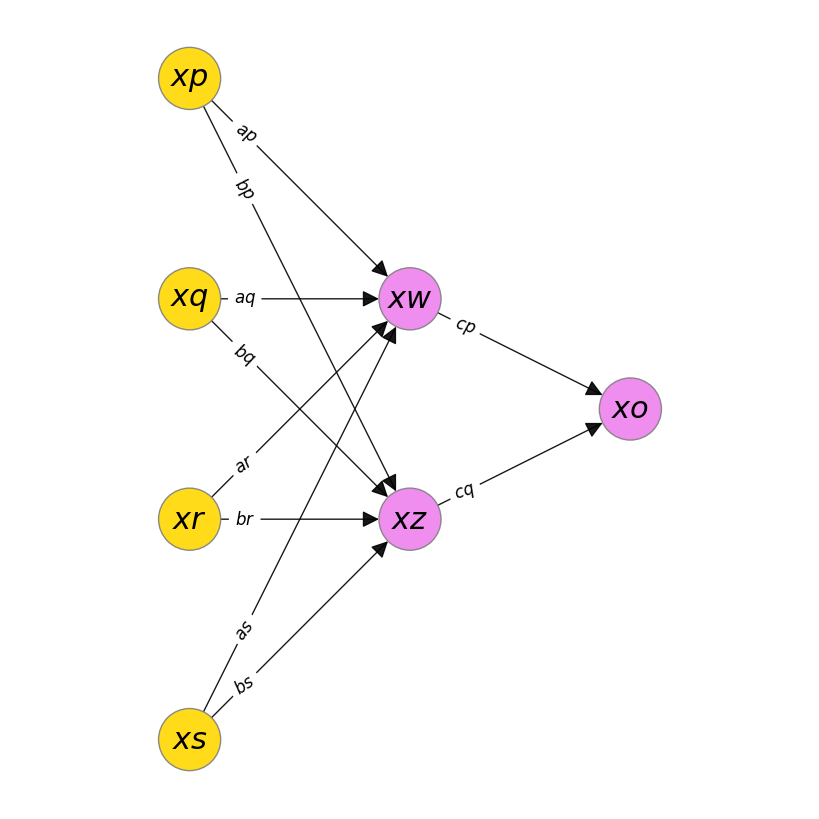



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

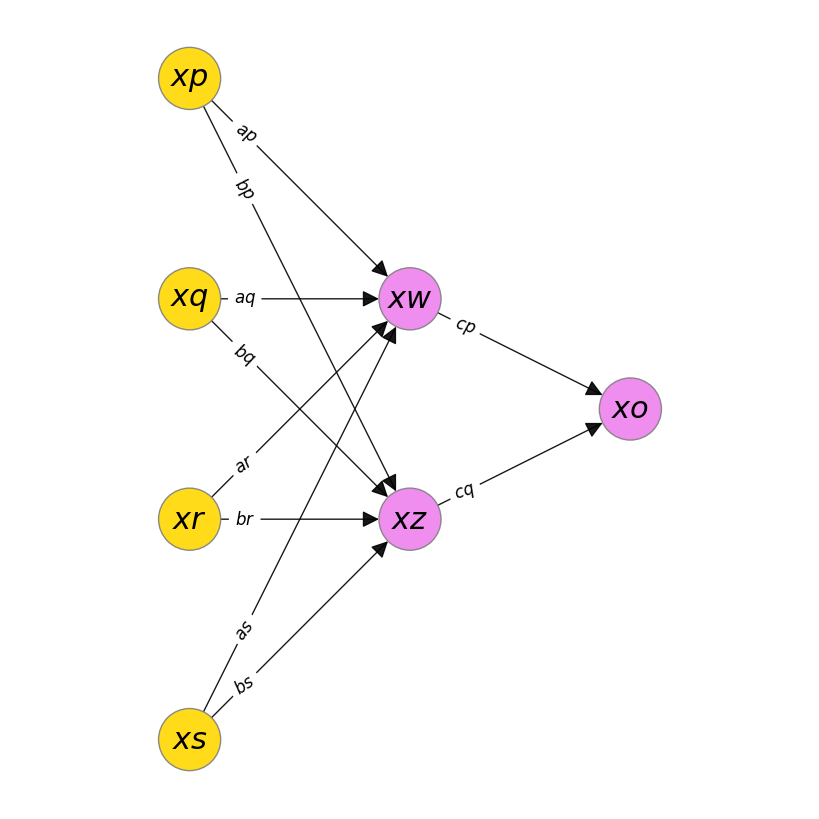



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

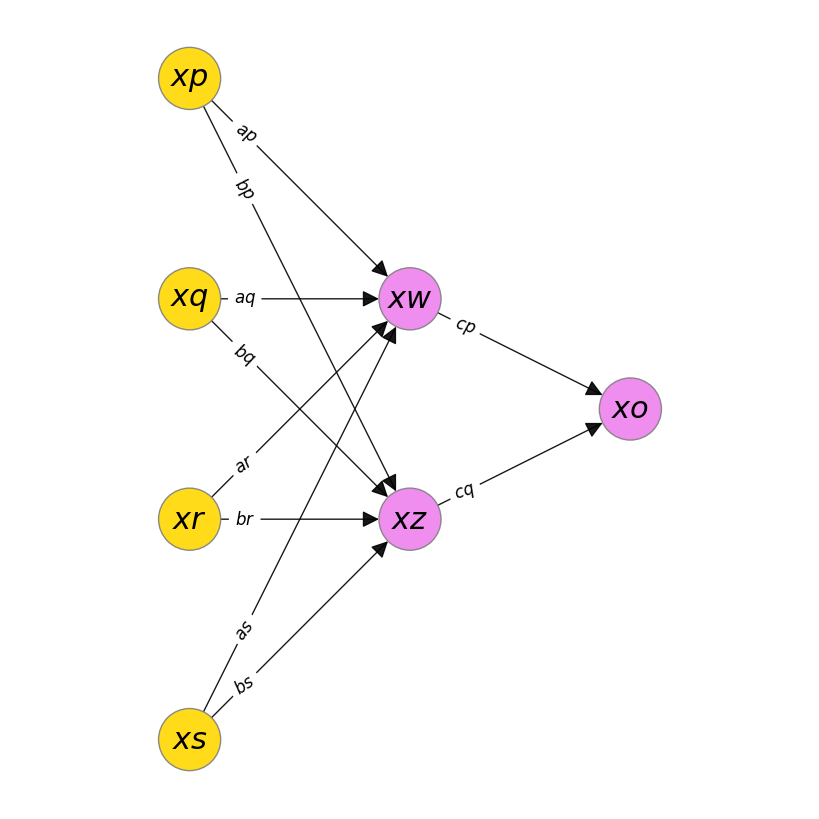

In [211]:
Loss_SGD_multi_neuron_1 = run_SGD_m_multi_neuron(learning_rate=1e-3, mu = 0, training_iterations = 100000)
Loss_SGD_m_multi_neuron_1 = run_SGD_m_multi_neuron(learning_rate=1e-3, mu = 0.95, training_iterations = 100000)
Loss_adam_multi_neuron_1 = run_adam_multi_neuron(learning_rate = 1e-3, beta1 = 0.99, beta2 = 0.999, training_iterations = 100000)



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

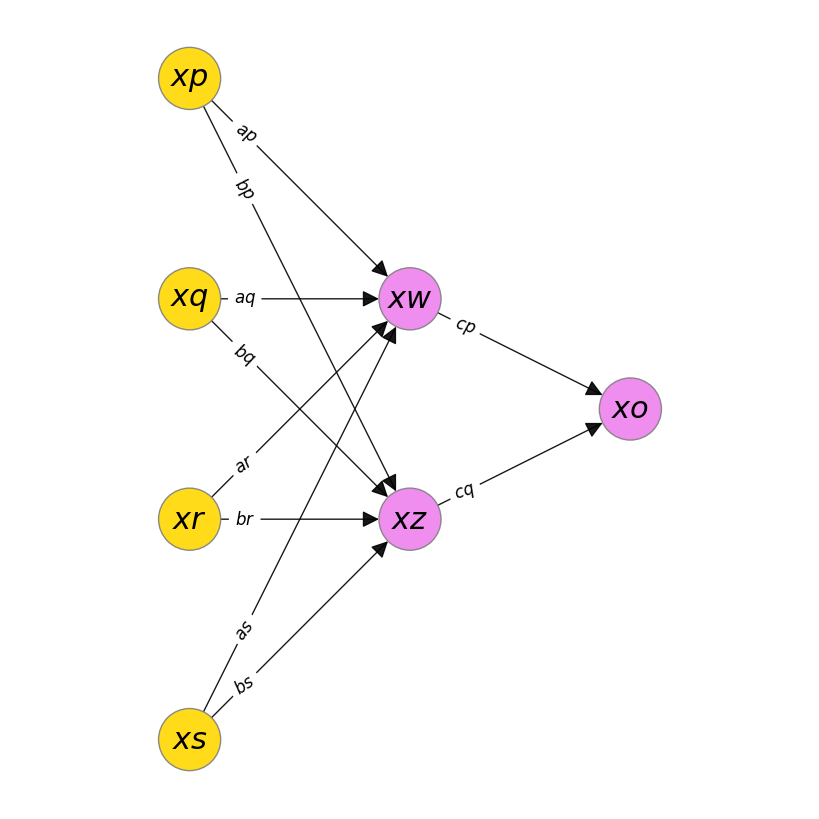



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

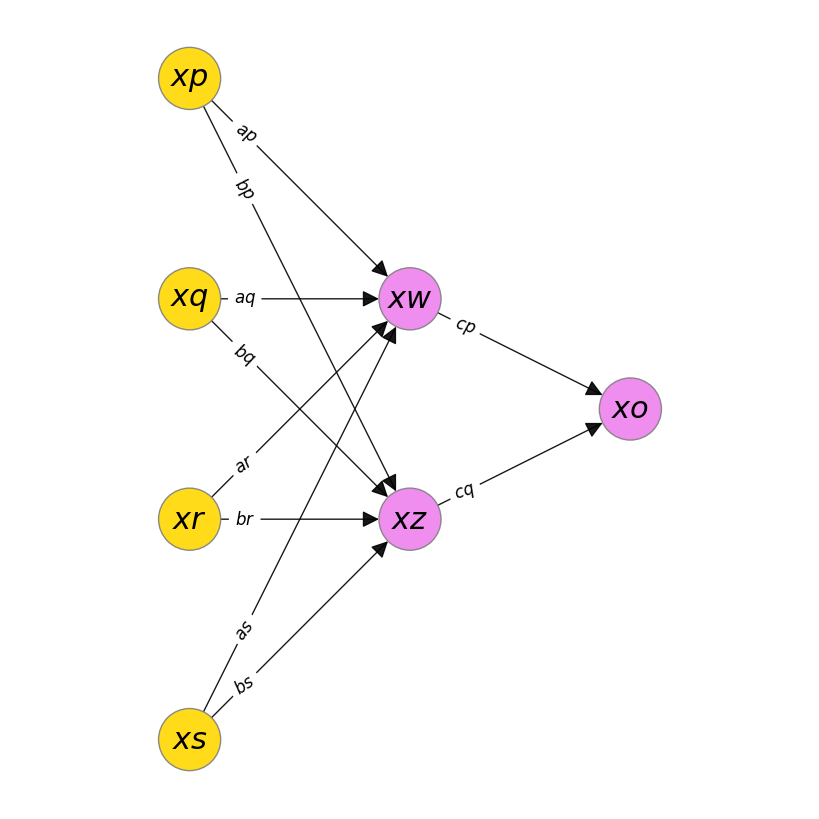



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xs', 'xq', 'xw', 'xz', 'xr', 'xp'}


[layer index: 1] learnable params: {'aq', 'bp', 'br', 'as', 'bs', 'ap', 'ar', 'bq'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xp', 'xs', 'xq', 'xr'}


[layer index: 1] leads_to dictionary: {'xs': {'xw', 'xz'}, 'xq': {'xw', 'xz'}, 'xw': set(), 'xz': set(), 'xr': {'xw', 'xz'}, 'xp': {'xw', 'xz'}}


[layer index: 2] all variables: {'xs', 'xo', 'xq', 'xw', 'xz', 'x

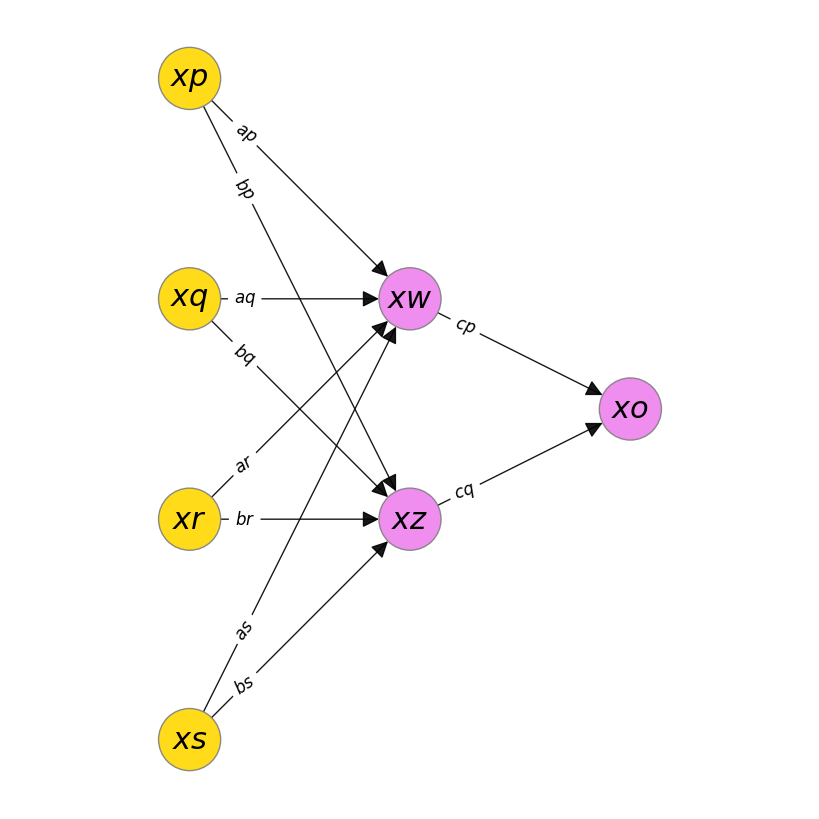

In [213]:
Loss_SGD_multi_neuron_2 = run_SGD_m_multi_neuron(learning_rate=5e-4, mu = 0, training_iterations = 100000)
Loss_SGD_m_multi_neuron_2 = run_SGD_m_multi_neuron(learning_rate=5e-4, mu = 0.95, training_iterations = 100000)
Loss_adam_multi_neuron_2 = run_adam_multi_neuron(learning_rate = 5e-4, beta1 = 0.99, beta2 = 0.999, training_iterations = 100000)

## Compare SGD, SGD+, Adam for multi_neuron implementation

### Compare the loss with lr = 1e-3 and lr = 5e-4, in both case, Loss_Adam < Loss_SGD+ < Loss_SGD

- It is easy to see that the loss of Adam is much smaller than SGD+ and SGD. As the problem becomes complex, Adam shows larger advantage over the other two algorithm.  
- The Loss of SGD+ and Adam is smaller than SDG especially at the very begining. Adam and SGD+ can outperform SGD with much less interation number.   

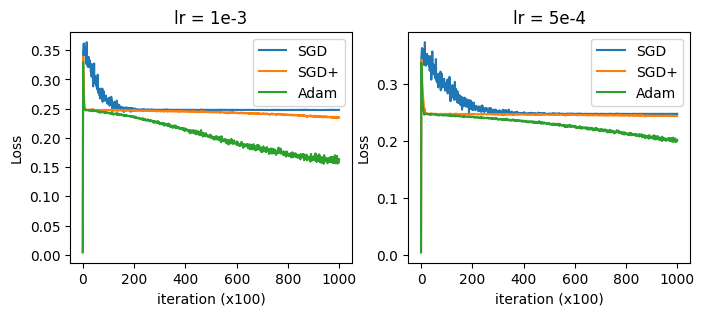

In [214]:
fig, axs = plt.subplots(1, 2, figsize = (8,3))

axs[0].plot(Loss_SGD_multi_neuron_1, label = 'SGD')
axs[0].plot(Loss_SGD_m_multi_neuron_1, label = 'SGD+')
axs[0].plot(Loss_adam_multi_neuron_1, label = 'Adam')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('iteration (x100)')
axs[0].set_title('lr = 1e-3')
axs[0].legend()

axs[1].plot(Loss_SGD_multi_neuron_2, label = 'SGD')
axs[1].plot(Loss_SGD_m_multi_neuron_2, label = 'SGD+')
axs[1].plot(Loss_adam_multi_neuron_2, label = 'Adam')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('iteration (x100)')
axs[1].set_title('lr = 5e-4')
axs[1].legend()